In [ ]:
# Importing the 'drive' module from the 'google.colab' package
from google.colab import drive

# Mounting Google Drive to the '/content/drive' directory
drive.mount('/content/drive')

# Setting the root directory path for the dataset
root = '/content/drive/MyDrive/Colab Notebooks/FindIT/Dataset/hotel/'


Mounted at /content/drive


In [ ]:
# Importing necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

## 1. Dataset

### 1.1 Input Table

In [ ]:
# Reading the CSV file 'training_set_labels.csv' and storing the data in the 'train_label' DataFrame
df = pd.read_csv(root+'df.csv')

### 1.2 Table Setting

In [ ]:
# Setting the maximum number of columns to display as None (unlimited)
pd.set_option('display.max_columns', None)

# Setting the maximum number of rows to display as None (unlimited)
pd.set_option('display.max_rows', None)


In [ ]:
df.head(2)

,rating,location,amount,ratings,deskripsiRating,jumlahReviews,Fasilitas_Restaurant,Fasilitas_BAR,Fasilitas_Internet,Fasilitas_GYM,Fasilitas_SwimmingPool
0,7.8 Very GoodFrom 10 reviews,Stokol,13500,7.8,Very Good,10.0,True,True,False,False,True
1,5.6 GoodFrom 4 reviews,Machlessvile,13000,5.6,Good,4.0,True,False,False,True,False


In [ ]:
df.shape

(3066, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rating                  2429 non-null   object 
 1   location                3066 non-null   object 
 2   amount                  3066 non-null   int64  
 3   ratings                 2406 non-null   float64
 4   deskripsiRating         2406 non-null   object 
 5   jumlahReviews           2429 non-null   float64
 6   Fasilitas_Restaurant    2765 non-null   object 
 7   Fasilitas_BAR           2765 non-null   object 
 8   Fasilitas_Internet      2765 non-null   object 
 9   Fasilitas_GYM           2765 non-null   object 
 10  Fasilitas_SwimmingPool  2765 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 263.6+ KB


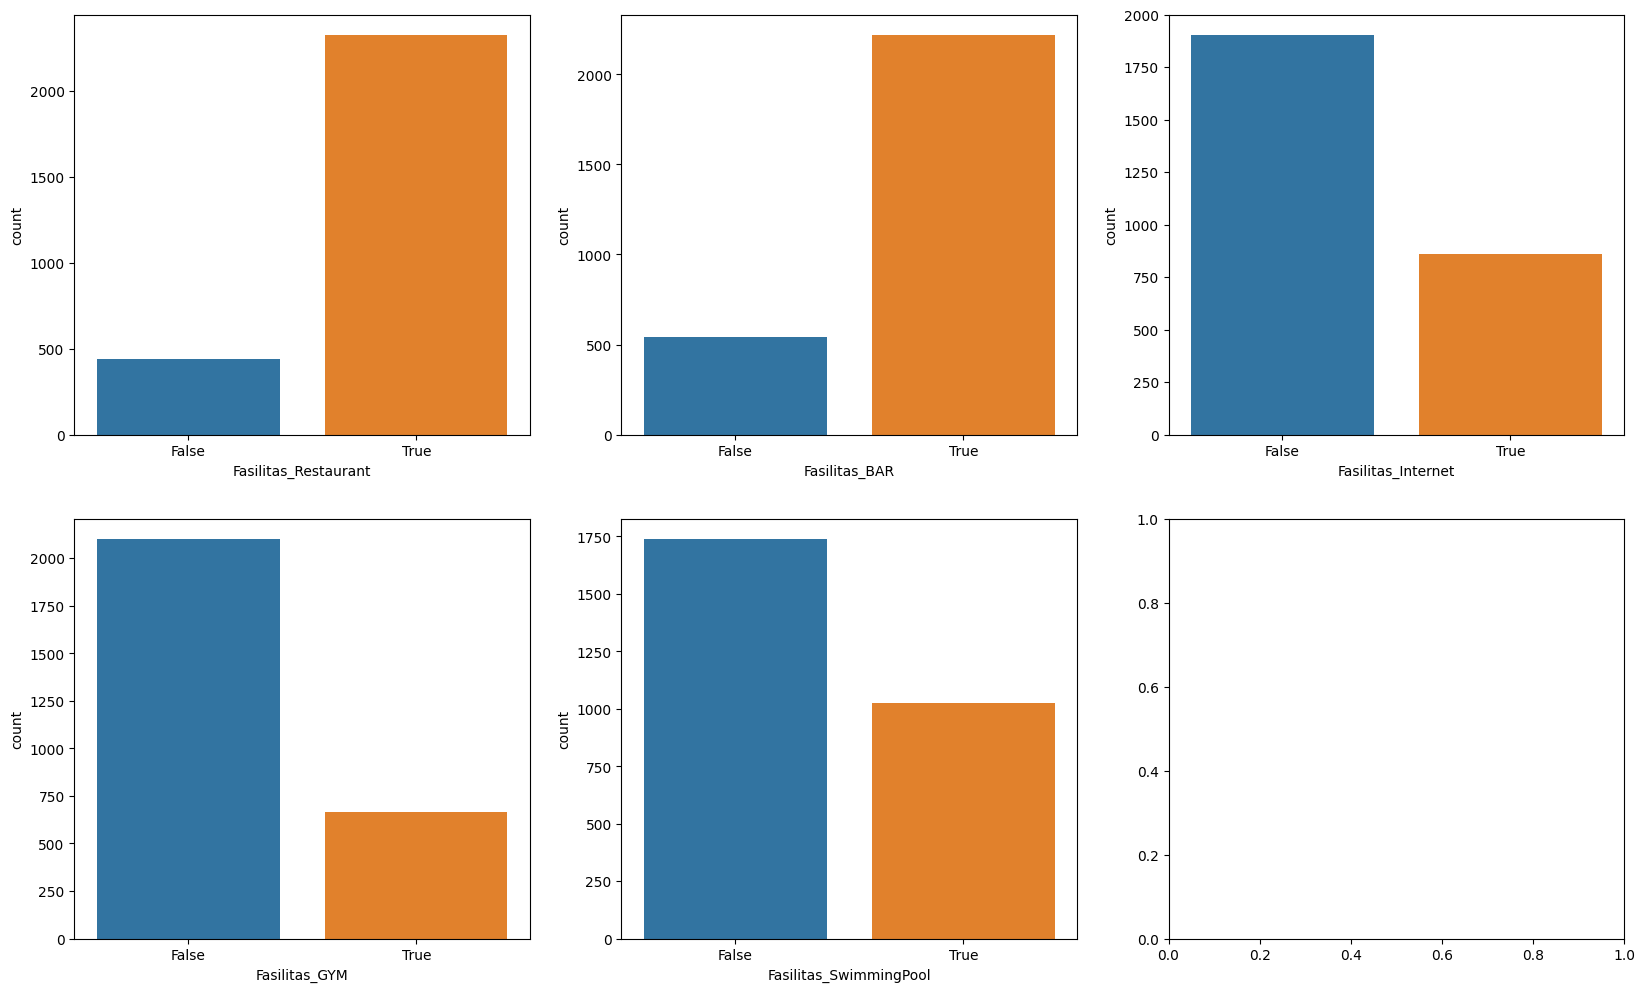

In [ ]:
# Exploring numerical data
def plot_categorical_data():
    fig,axes =plt.subplots(2,3,figsize = (20,12))

    sns.countplot(ax = axes[0,0], x='Fasilitas_Restaurant',data=df)
    sns.countplot(ax = axes[0,1], x='Fasilitas_BAR',data=df)
    sns.countplot(ax = axes[0,2], x='Fasilitas_Internet',data=df)
    sns.countplot(ax = axes[1,0], x='Fasilitas_GYM',data=df)
    sns.countplot(ax = axes[1,1], x='Fasilitas_SwimmingPool',data=df)
plot_categorical_data()

In [ ]:
df['Fasilitas_Restaurant'].value_counts()

True     2327
False     438
Name: Fasilitas_Restaurant, dtype: int64

In [ ]:
df['Fasilitas_Internet'].value_counts()

False    1905
True      860
Name: Fasilitas_Internet, dtype: int64

In [ ]:
df['Fasilitas_GYM'].value_counts()

False    2102
True      663
Name: Fasilitas_GYM, dtype: int64

In [ ]:
df['Fasilitas_SwimmingPool'].value_counts()

False    1740
True     1025
Name: Fasilitas_SwimmingPool, dtype: int64

<Axes: xlabel='deskripsiRating', ylabel='count'>

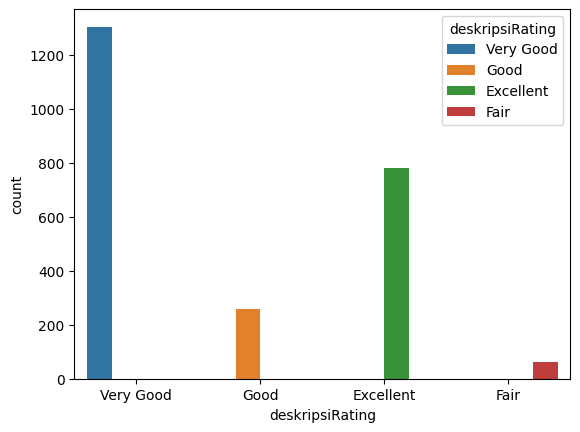

In [ ]:
sns.countplot( x='deskripsiRating',hue = 'deskripsiRating', data=df)


<Axes: ylabel='deskripsiRating'>

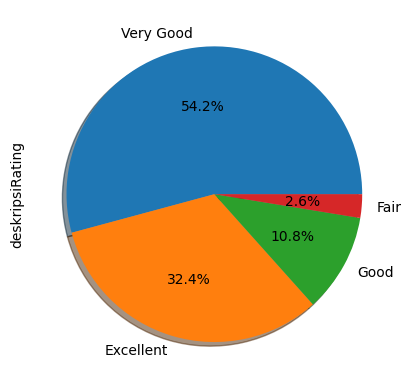

In [ ]:

df['deskripsiRating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

In [ ]:
fig = px.pie(df, names='deskripsiRating',)
fig.update_layout(title='Persentase dari Rating')
fig.show()

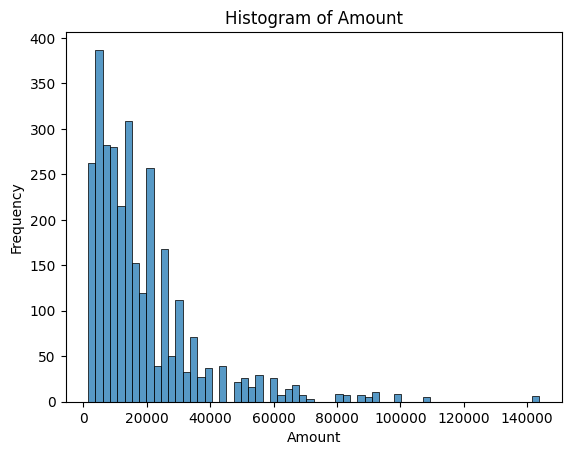

In [ ]:
sns.histplot(data=df, x='amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')
plt.show()

In [ ]:
df['location'].value_counts()

Stokol          561
Andeman         492
Wanderland      475
Hallerson       408
Uberlandia      406
Willsmian       328
Machlessvile    261
Ubisville       135
Name: location, dtype: int64

### rekomendasi fasilitas


In [ ]:
df.head()

,rating,location,amount,ratings,deskripsiRating,jumlahReviews,Fasilitas_Restaurant,Fasilitas_BAR,Fasilitas_Internet,Fasilitas_GYM,Fasilitas_SwimmingPool
0,7.8 Very GoodFrom 10 reviews,Stokol,13500,7.8,Very Good,10.0,True,True,False,False,True
1,5.6 GoodFrom 4 reviews,Machlessvile,13000,5.6,Good,4.0,True,False,False,True,False
2,7.2 Very GoodFrom 38 reviews,Wanderland,19000,7.2,Very Good,38.0,True,True,False,True,True
3,7.3 Very GoodFrom 6 reviews,Uberlandia,6000,7.3,Very Good,6.0,True,True,False,False,False
4,7.2 Very GoodFrom 30 reviews,Stokol,20000,7.2,Very Good,30.0,True,False,True,False,False


In [ ]:
pilih1 = df[(df['Fasilitas_Restaurant'] == True) & (df['Fasilitas_BAR'] == True) & (df['Fasilitas_Internet'] == False)& (df['Fasilitas_GYM'] == False) & (df['Fasilitas_SwimmingPool'] == False)]

In [ ]:
#pilih1 = df[(df['Fasilitas_Restaurant'] == True) & (df['Fasilitas_BAR'] == False) & (df['Fasilitas_Internet'] == False)& (df['Fasilitas_GYM'] == False) & (df['Fasilitas_SwimmingPool'] == False)]

In [ ]:
pilih2 = df[(df['Fasilitas_Restaurant'] == True) & (df['Fasilitas_BAR'] == True) & (df['Fasilitas_Internet'] == False)& (df['Fasilitas_GYM'] == False) & (df['Fasilitas_SwimmingPool'] == True)]

In [ ]:
pilih5 = df[(df['Fasilitas_Restaurant'] == True) & (df['Fasilitas_BAR'] == True) & (df['Fasilitas_Internet'] == True)& (df['Fasilitas_GYM'] == False) & (df['Fasilitas_SwimmingPool'] == False)]

In [ ]:
pilih3 = df[(df['Fasilitas_Restaurant'] == True) & (df['Fasilitas_BAR'] == True) & (df['Fasilitas_Internet'] == True)& (df['Fasilitas_GYM'] == False) & (df['Fasilitas_SwimmingPool'] == True)]

In [ ]:
pilih4 = df[(df['Fasilitas_Restaurant'] == True) & (df['Fasilitas_BAR'] == True) & (df['Fasilitas_Internet'] == True)& (df['Fasilitas_GYM'] == True) & (df['Fasilitas_SwimmingPool'] == True)]

In [ ]:
pilih6 = df[(df['Fasilitas_Restaurant'] == True) & (df['Fasilitas_BAR'] == False) & (df['Fasilitas_Internet'] == True)& (df['Fasilitas_GYM'] == False) & (df['Fasilitas_SwimmingPool'] == True)]

In [ ]:
pilih1.head()

,rating,location,amount,ratings,deskripsiRating,jumlahReviews,Fasilitas_Restaurant,Fasilitas_BAR,Fasilitas_Internet,Fasilitas_GYM,Fasilitas_SwimmingPool
3,7.3 Very GoodFrom 6 reviews,Uberlandia,6000,7.3,Very Good,6.0,True,True,False,False,False
7,7.3 Very GoodFrom 7 reviews,Willsmian,13500,7.3,Very Good,7.0,True,True,False,False,False
8,NaN,Andeman,7475,NaN,NaN,NaN,True,True,False,False,False
9,7.7 Very GoodFrom 8 reviews,Stokol,20000,7.7,Very Good,8.0,True,True,False,False,False
12,From 1 review,Stokol,7500,NaN,NaN,1.0,True,True,False,False,False


In [ ]:
pilih6.describe()

,amount,ratings,jumlahReviews
count,43.000000,43.000000,43.000000
mean,17209.302326,7.058140,39.534884
std,8746.858319,1.239668,50.768545
min,6000.000000,5.000000,2.000000
25%,15000.000000,6.300000,3.000000
50%,16000.000000,7.300000,12.000000
75%,20000.000000,8.200000,97.000000
max,37200.000000,9.100000,154.000000


In [ ]:
pilih5.describe()

,amount,ratings,jumlahReviews
count,270.000000,226.000000,226.000000
mean,21353.633333,7.275664,18.584071
std,22926.411813,1.222377,24.005453
min,3000.000000,2.000000,1.000000
25%,8800.000000,6.800000,4.000000
50%,14500.000000,7.400000,11.000000
75%,21500.000000,8.100000,25.250000
max,143802.000000,10.000000,125.000000


In [ ]:
pilih1.describe()

,amount,ratings,jumlahReviews
count,815.000000,681.000000,688.000000
mean,12001.072393,7.105286,12.337209
std,13960.817497,1.437605,16.791372
min,1700.000000,2.000000,1.000000
25%,5750.000000,6.400000,3.000000
50%,9200.000000,7.300000,6.000000
75%,13500.000000,8.000000,14.000000
max,143802.000000,10.000000,125.000000


In [ ]:
pilih2.describe()

,amount,ratings,jumlahReviews
count,154.00000,135.000000,142.000000
mean,23323.12987,7.645185,16.035211
std,16407.90645,1.183135,22.518523
min,3500.00000,2.400000,1.000000
25%,12000.00000,7.300000,6.000000
50%,16750.00000,7.800000,9.000000
75%,25000.00000,8.000000,23.750000
max,67000.00000,10.000000,145.000000


In [ ]:
pilih3.describe()

,amount,ratings,jumlahReviews
count,116.000000,110.000000,112.000000
mean,31019.612069,7.554545,25.928571
std,17807.778835,1.759568,35.229419
min,6000.000000,2.400000,1.000000
25%,17000.000000,7.400000,4.750000
50%,25000.000000,7.800000,23.000000
75%,49500.000000,8.000000,28.000000
max,67000.000000,10.000000,145.000000


In [ ]:
pilih4.describe()

,amount,ratings,jumlahReviews
count,166.000000,154.000000,154.000000
mean,31374.783133,7.607792,24.707792
std,21516.188894,0.856008,48.533921
min,6500.000000,5.000000,2.000000
25%,15500.000000,7.100000,6.000000
50%,27000.000000,7.600000,10.000000
75%,40191.000000,8.400000,22.000000
max,100000.000000,8.900000,226.000000


### Distribusi Harga

In [ ]:
row_with_min_amount = df["amount"].idxmin()

# Menampilkan baris dengan amount tertinggi
print(df.loc[row_with_min_amount])

rating                       NaN
location                  Stokol
amount                      1500
ratings                      NaN
deskripsiRating              NaN
jumlahReviews                NaN
Fasilitas_Restaurant         NaN
Fasilitas_BAR                NaN
Fasilitas_Internet           NaN
Fasilitas_GYM                NaN
Fasilitas_SwimmingPool       NaN
Name: 162, dtype: object


In [ ]:
df.describe()

,amount,ratings,jumlahReviews
count,3066.000000,2406.000000,2429.000000
mean,18627.106654,7.284788,18.482091
std,17558.426391,1.363007,34.673272
min,1500.000000,2.000000,1.000000
25%,7140.000000,6.600000,3.000000
50%,14000.000000,7.400000,8.000000
75%,24000.000000,8.100000,23.000000
max,143802.000000,10.000000,351.000000


In [ ]:
df.head(1)

,rating,location,amount,ratings,deskripsiRating,jumlahReviews,Fasilitas_Restaurant,Fasilitas_BAR,Fasilitas_Internet,Fasilitas_GYM,Fasilitas_SwimmingPool
0,7.8 Very GoodFrom 10 reviews,Stokol,13500,7.8,Very Good,10.0,True,True,False,False,True


In [ ]:
df.drop(['ratings'], axis=1, inplace=True)

In [ ]:
# Calculating the total number of missing values for each column and sorting in descending order
total_missing = df.isnull().sum().sort_values(ascending=False)

# Calculating the percentage of missing values for each column
percent_1 = df.isnull().sum() / df.isnull().count() * 100

# Rounding the percentage values to one decimal place and sorting in descending order
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# Creating a DataFrame 'missing_data' by combining the total missing values and percentage values
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])

# Resetting the index of 'missing_data' DataFrame and renaming the column
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})

# Showing the DataFrame 'missing_data'
missing_data

,Column,Total Missing,%
0,deskripsiRating,660,21.5
1,rating,637,20.8
2,jumlahReviews,637,20.8
3,Fasilitas_Restaurant,301,9.8
4,Fasilitas_BAR,301,9.8
5,Fasilitas_Internet,301,9.8
6,Fasilitas_GYM,301,9.8
7,Fasilitas_SwimmingPool,301,9.8
8,location,0,0.0
9,amount,0,0.0


In [ ]:
df['deskripsiRating'].value_counts()

Very Good    1304
Excellent     780
Good          260
Fair           62
Name: deskripsiRating, dtype: int64

### Rating

In [ ]:
verrygood = df[df['deskripsiRating']=='Very Good']
good = df[df['deskripsiRating']=='Good']
Excellent = df[df['deskripsiRating']=='Excellent']
Fair = df[df['deskripsiRating']=='Fair']

In [ ]:
df.head(2)

,rating,location,amount,deskripsiRating,jumlahReviews,Fasilitas_Restaurant,Fasilitas_BAR,Fasilitas_Internet,Fasilitas_GYM,Fasilitas_SwimmingPool
0,7.8 Very GoodFrom 10 reviews,Stokol,13500,Very Good,10.0,True,True,False,False,True
1,5.6 GoodFrom 4 reviews,Machlessvile,13000,Good,4.0,True,False,False,True,False


In [ ]:
good.head()

,rating,location,amount,deskripsiRating,jumlahReviews,Fasilitas_Restaurant,Fasilitas_BAR,Fasilitas_Internet,Fasilitas_GYM,Fasilitas_SwimmingPool
1,5.6 GoodFrom 4 reviews,Machlessvile,13000,Good,4.0,True,False,False,True,False
5,5.4 GoodFrom 13 reviews,Uberlandia,4000,Good,13.0,False,False,True,False,False
15,5.4 GoodFrom 13 reviews,Uberlandia,4000,Good,13.0,False,False,False,False,False
43,5.6 GoodFrom 50 reviews,Uberlandia,5000,Good,50.0,True,True,True,False,False
49,5.6 GoodFrom 4 reviews,Hallerson,13000,Good,4.0,True,False,False,True,False


In [ ]:
verrygood.describe()

,amount,jumlahReviews
count,1304.000000,1304.000000
mean,19041.842025,23.608896
std,16090.705856,38.775467
min,2500.000000,1.000000
25%,10000.000000,6.000000
50%,15000.000000,12.000000
75%,20000.000000,29.000000
max,143802.000000,351.000000


In [ ]:
good.describe()

,amount,jumlahReviews
count,260.000000,260.000000
mean,13684.834615,10.292308
std,14431.050214,13.159518
min,2250.000000,1.000000
25%,4500.000000,3.000000
50%,7700.000000,4.000000
75%,17000.000000,10.000000
max,88800.000000,50.000000


In [ ]:
Fair.describe()

,amount,jumlahReviews
count,62.000000,62.000000
mean,12161.612903,2.435484
std,13710.302121,1.275507
min,2200.000000,1.000000
25%,3200.000000,1.000000
50%,7000.000000,2.000000
75%,15360.000000,4.000000
max,45000.000000,5.000000


In [ ]:
Excellent.describe()

,amount,jumlahReviews
count,780.000000,780.000000
mean,24774.528205,14.428205
std,19003.033946,32.593206
min,2500.000000,1.000000
25%,12000.000000,2.000000
50%,20000.000000,5.000000
75%,30000.000000,11.000000
max,108900.000000,226.000000


### Location

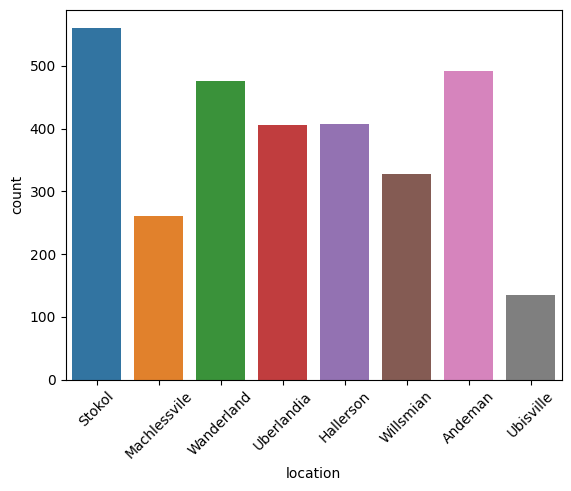

In [ ]:
sns.countplot(x='location',data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['location'].value_counts()

Stokol          561
Andeman         492
Wanderland      475
Hallerson       408
Uberlandia      406
Willsmian       328
Machlessvile    261
Ubisville       135
Name: location, dtype: int64

In [ ]:
stokol = df[df['location']=='Stokol']
Andeman = df[df['location']=='Andeman']
Wanderman = df[df['location']=='Wanderland']
Hallerson = df[df['location']=='Hallerson']
Willsmian = df[df['location']=='Willsmian']
Machlessvile = df[df['location']=='Machlessvile']
ubisvilee = df[df['location']=='Ubisville']
Uberlandia = df[df['location']=='Uberlandia']

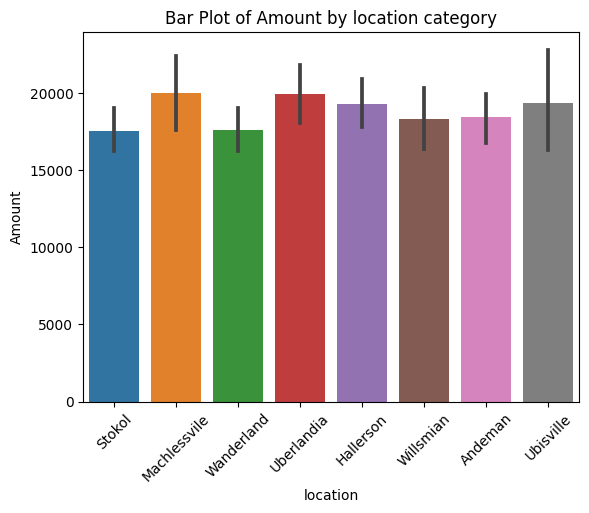

In [ ]:
sns.barplot(data=df, x='location', y='amount')
plt.xlabel('location')
plt.ylabel('Amount')
plt.title('Bar Plot of Amount by location category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
jumlah_per_lokasi = df.groupby('location')['amount'].sum()
jumlah_per_lokasi

location
Andeman         9075247
Hallerson       7883224
Machlessvile    5220477
Stokol          9858324
Uberlandia      8096619
Ubisville       2613853
Wanderland      8351630
Willsmian       6011335
Name: amount, dtype: int64

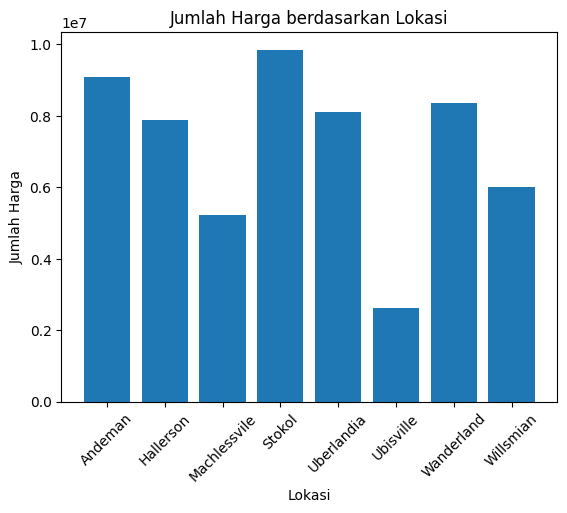

In [ ]:
plt.bar(jumlah_per_lokasi.index, jumlah_per_lokasi.values)

# Memberikan label pada sumbu x dan y serta judul plot
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Harga')
plt.title('Jumlah Harga berdasarkan Lokasi')
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

In [ ]:
Uberlandia.describe()

,amount,jumlahReviews
count,406.000000,324.000000
mean,19942.411330,20.669753
std,18794.302614,38.453046
min,1500.000000,1.000000
25%,8000.000000,4.000000
50%,15000.000000,9.000000
75%,25000.000000,25.000000
max,143802.000000,351.000000


In [ ]:
stokol.describe()

,amount,jumlahReviews
count,561.000000,442.000000
mean,17572.770053,17.061086
std,16450.480338,33.423665
min,1500.000000,1.000000
25%,7125.000000,3.000000
50%,13160.000000,7.000000
75%,21500.000000,18.000000
max,143802.000000,351.000000


In [ ]:
Andeman.describe()

,amount,jumlahReviews
count,492.000000,394.000000
mean,18445.623984,18.606599
std,17296.215005,35.879925
min,1700.000000,1.000000
25%,7000.000000,3.000000
50%,14000.000000,8.000000
75%,24125.000000,22.750000
max,143802.000000,351.000000


In [ ]:
Wanderman.describe()

,amount,jumlahReviews
count,475.000000,381.000000
mean,17582.378947,18.335958
std,15577.425017,33.186990
min,1700.000000,1.000000
25%,7000.000000,3.000000
50%,14000.000000,8.000000
75%,20220.000000,22.000000
max,100000.000000,351.000000


In [ ]:
Hallerson.describe()

,amount,jumlahReviews
count,408.000000,329.000000
mean,19321.627451,21.848024
std,16875.108860,39.107747
min,1500.000000,1.000000
25%,7500.000000,4.000000
50%,15000.000000,10.000000
75%,25000.000000,25.000000
max,100000.000000,351.000000


In [ ]:
Willsmian.describe()

,amount,jumlahReviews
count,328.000000,247.000000
mean,18327.240854,16.004049
std,18622.629303,30.689568
min,1700.000000,1.000000
25%,7000.000000,3.000000
50%,13000.000000,7.000000
75%,20250.000000,18.000000
max,143802.000000,351.000000


In [ ]:
Machlessvile.describe()

,amount,jumlahReviews
count,261.000000,199.000000
mean,20001.827586,19.417085
std,20065.915278,35.106072
min,1500.000000,1.000000
25%,7452.000000,4.000000
50%,13975.000000,9.000000
75%,25000.000000,23.500000
max,143802.000000,351.000000


In [ ]:
ubisvilee.describe()

,amount,jumlahReviews
count,135.000000,113.000000
mean,19361.874074,11.796460
std,19657.586768,17.427994
min,2500.000000,1.000000
25%,8900.000000,3.000000
50%,13500.000000,6.000000
75%,21500.000000,14.000000
max,143802.000000,154.000000


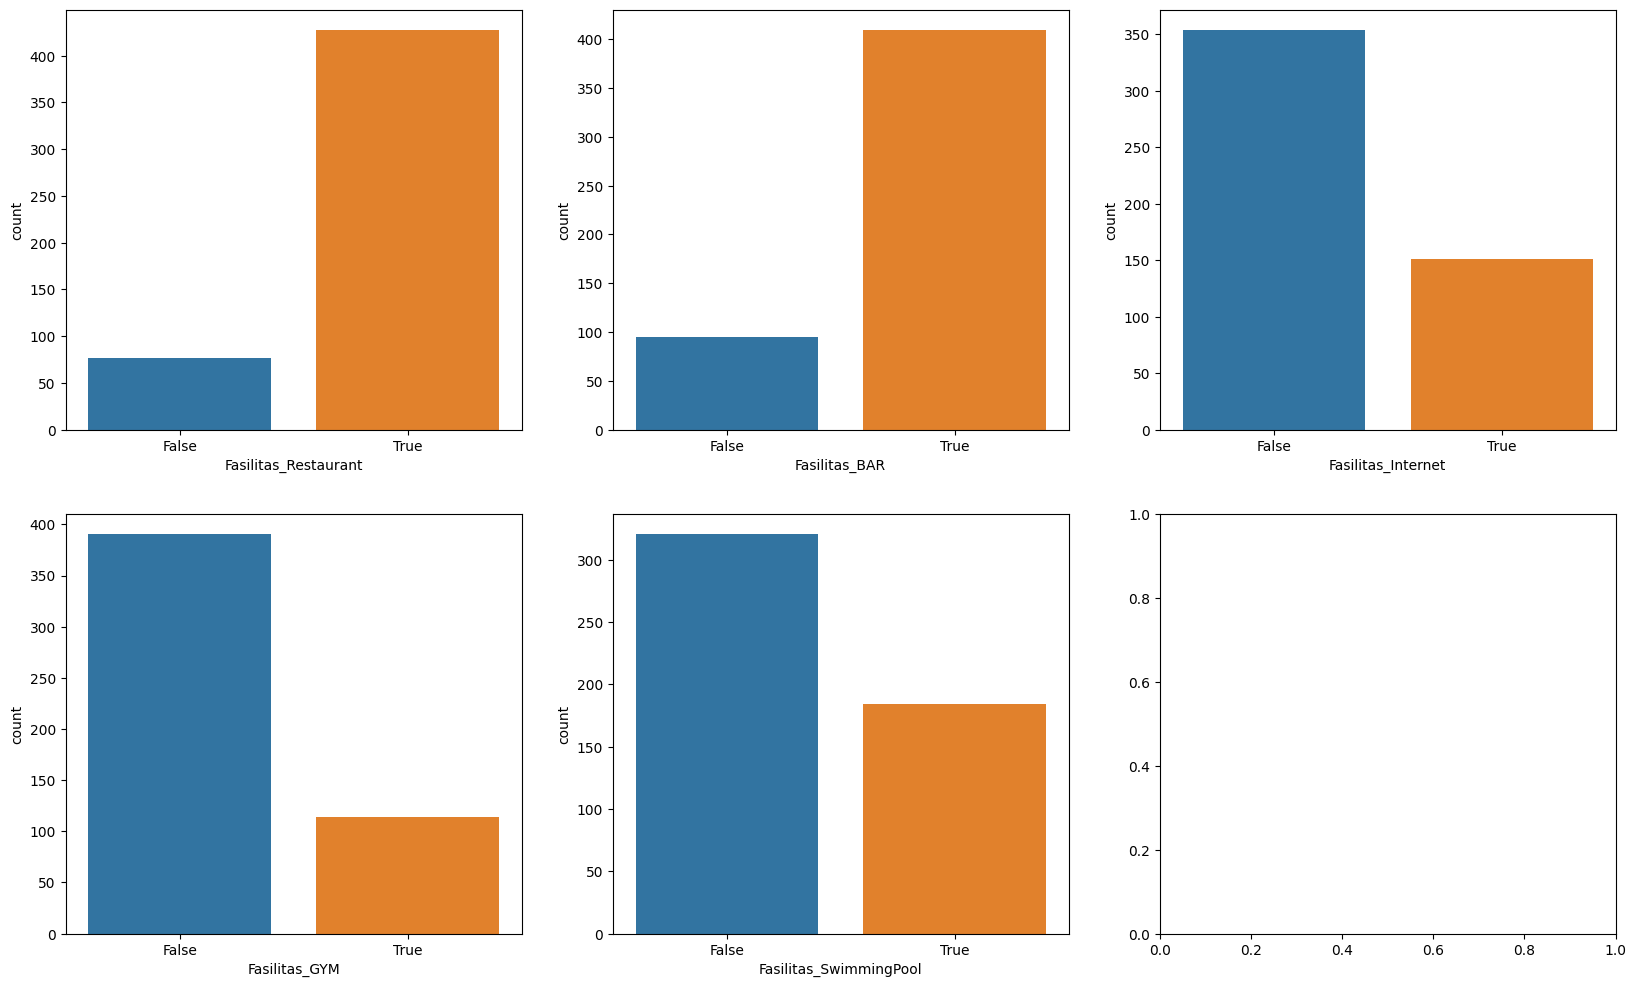

In [ ]:
# Exploring numerical data
def plot_categorical_data():
    fig,axes =plt.subplots(2,3,figsize = (20,12))

    sns.countplot(ax = axes[0,0], x='Fasilitas_Restaurant',data=stokol)
    sns.countplot(ax = axes[0,1], x='Fasilitas_BAR',data=stokol)
    sns.countplot(ax = axes[0,2], x='Fasilitas_Internet',data=stokol)
    sns.countplot(ax = axes[1,0], x='Fasilitas_GYM',data=stokol)
    sns.countplot(ax = axes[1,1], x='Fasilitas_SwimmingPool',data=stokol)
plot_categorical_data()

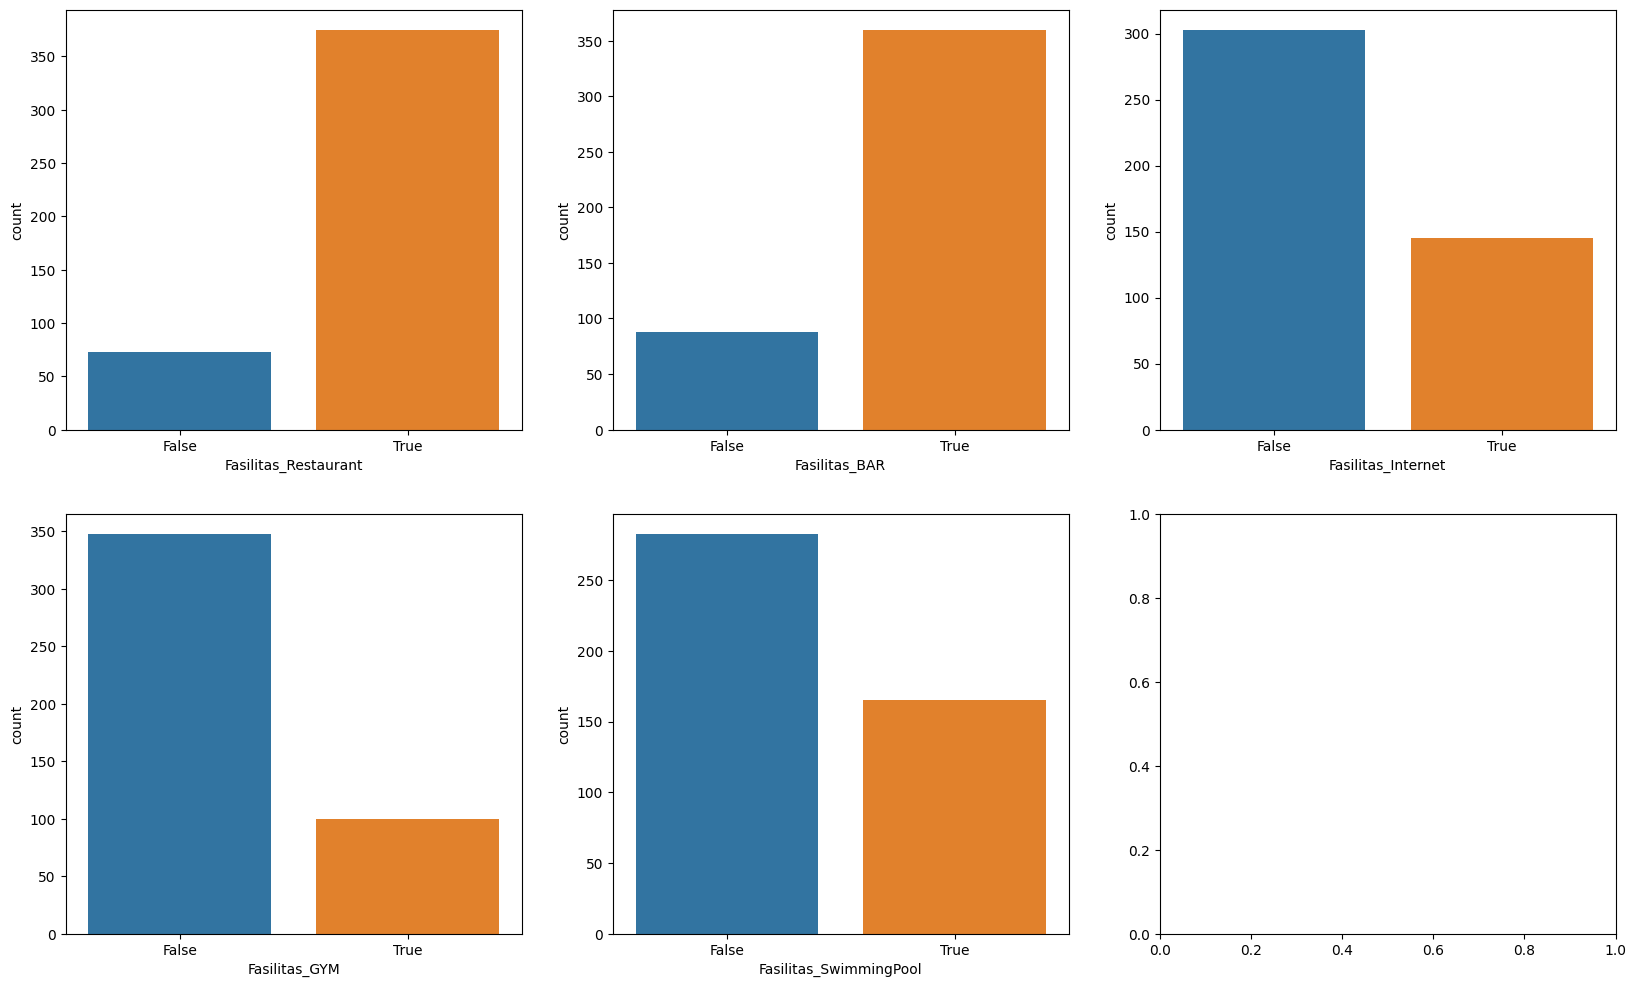

In [ ]:
def plot_categorical_data():
    fig,axes =plt.subplots(2,3,figsize = (20,12))

    sns.countplot(ax = axes[0,0], x='Fasilitas_Restaurant',data=Andeman)
    sns.countplot(ax = axes[0,1], x='Fasilitas_BAR',data=Andeman)
    sns.countplot(ax = axes[0,2], x='Fasilitas_Internet',data=Andeman)
    sns.countplot(ax = axes[1,0], x='Fasilitas_GYM',data=Andeman)
    sns.countplot(ax = axes[1,1], x='Fasilitas_SwimmingPool',data=Andeman)
plot_categorical_data()

In [ ]:
df['Fasilitas_GYM'].value_counts()

False    2102
True      663
Name: Fasilitas_GYM, dtype: int64

In [ ]:
df['Fasilitas_SwimmingPool'].value_counts()

False    1740
True     1025
Name: Fasilitas_SwimmingPool, dtype: int64